<ipython-input-40-fb69e9ca8cba>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset[col].fillna(titanic_dataset[col].mean(), inplace=True)
<ipython-input-40-fb69e9ca8cba>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

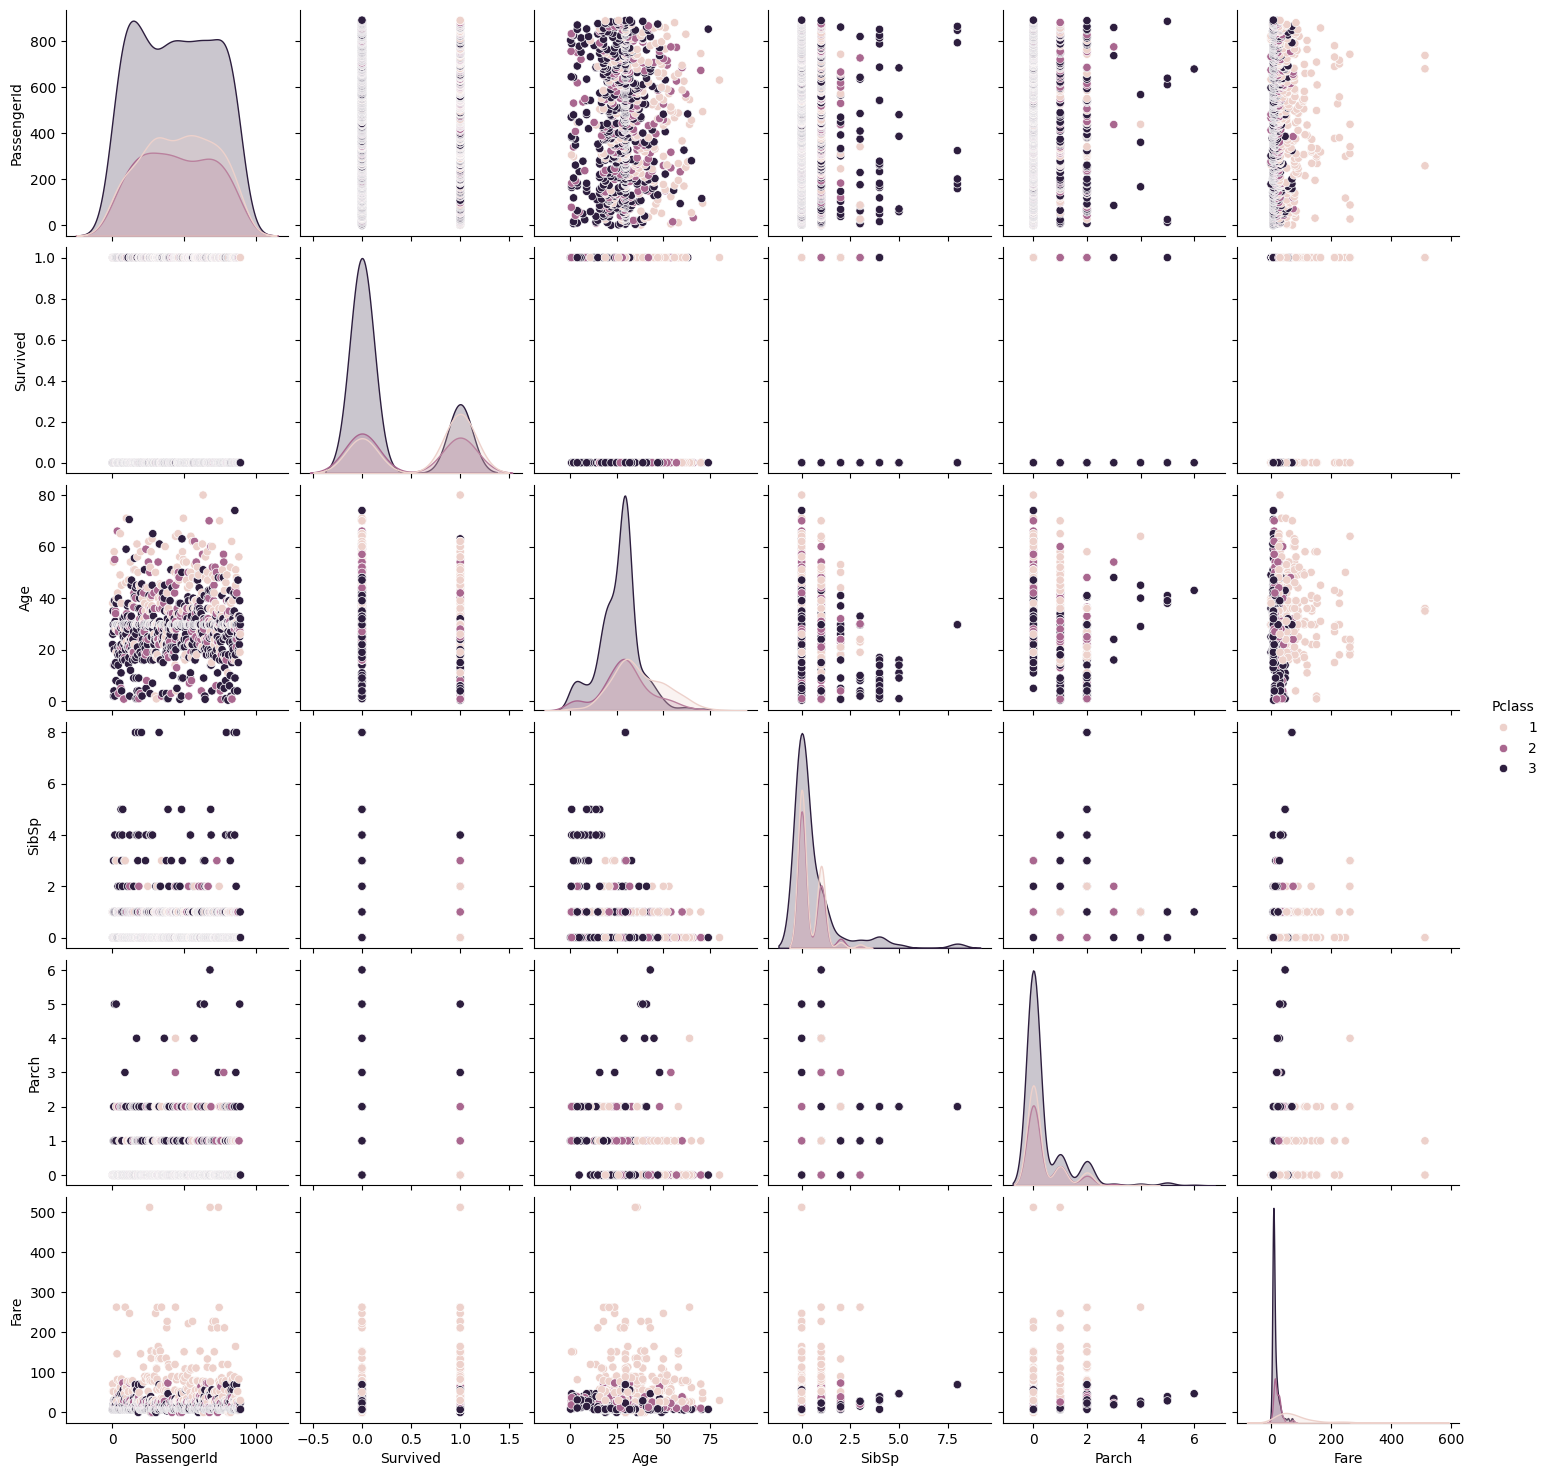

In [40]:
import pandas as pd # data manipulation and analysis
import seaborn as sns #Data visualization
import matplotlib.pyplot as  plt #creation of visualization and plotting graphs
import numpy as np #used for working with arrays
from sklearn.model_selection import train_test_split #splitting dataset into train set and test set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic_dataset = pd.read_csv(url)
for col in titanic_dataset.select_dtypes(include=np.number).columns:
    titanic_dataset[col].fillna(titanic_dataset[col].mean(), inplace=True)
for col in titanic_dataset.select_dtypes(include=['object', 'category']).columns:
    titanic_dataset[col].fillna(titanic_dataset[col].mode()[0], inplace=True) # Drop rows with missing values
titanic_dataset["Pclass"] = titanic_dataset["Pclass"].astype("int")


titanic_dataset.head(10)

sns.pairplot(titanic_dataset, hue='Pclass')
plt.show()
#plt.show()

In [41]:
# Handle missing values in the dataset
titanic_dataset.drop(index=0)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [42]:
X = titanic_dataset[['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_dataset['Pclass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
classifier = RandomForestClassifier(n_estimators=200)#Model
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[50  3  0]
 [ 3 27  3]
 [ 0  3 90]]
